<a href="https://colab.research.google.com/github/maushamkumar/Pandas/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction
**1.1 What is Cancer Mortality Rates?**
* Cancer mortality is the number of deaths due to cancer occurring in a specified population over a given period of time (typically 1 year).

**1.2 What is OLS Regression Challenge?**
* In this competition, you will build a multivariate Ordinary Least Squares regression model to predict Cancer Mortality Rates for US countries.

# Importing the necessary libraries 📘

In [1]:
import pandas as pd
import numpy as np


# Reading the data set

In [3]:
data = pd.read_csv('/content/cancer_reg.csv', encoding_errors="ignore")
data.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# 4. Basic Data Exploration


In [36]:
data.shape

(3042, 34)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
data.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


# Missing values

In [7]:
null_value = data.isnull().sum()
null_value[null_value > 0]

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

# Analyzing Variables

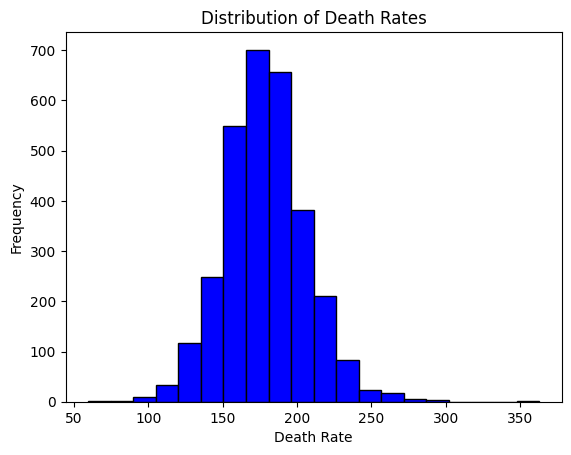

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['TARGET_deathRate'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Death Rates')
plt.show()

### Interpretation of Histogram
* The values are grouped into bins along the x-axis. The height of the bar indicates how many values of the data set fall into that bin.
* In this histogram, it shows all of the death rates where in x-axis is the death rate divided in bins and y-axis is the number of counties in that bin.
* 0 - 100 is the first bin which includes death between 0 - 100, 100-200, is the second bin which includes death between 100-200 and so on.

With the help of this, we will able to answer the following questions;-
* The centre of the data lies between 170 to 180
* Spread of the data 27 and the range between 50 to 380
* Shape of the is normally distributed but slightly positively skewed.
* There are Outliers as well
* There are 3 peaks in the data (bimodal data)
* Mean is greater than median ( slightly positively skewed data)  

In [9]:
data['TARGET_deathRate'].mean()

178.66406301279943

In [10]:
data['TARGET_deathRate'].median()

178.1

In [11]:
data['TARGET_deathRate'].std()

27.751511318595835

In [12]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=data['TARGET_deathRate'], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
fig.update_layout(title='Box plot of Death Rate',
                  yaxis_title='Death Rate',
                  width = 700,
                  height=500)
fig.show()

* The boxplot is a standardized way of displaying the distribution of data based on a five number summary ( Minimum, first quartile(Q1) , median, third quartile(Q3), and Maximum)

* Using boxplot it's quite easy to identifies outliers.

Mean of avgAnnCount:  606.3385437820807
Standard deviation of avgAnnCount:  1416.3562232267052


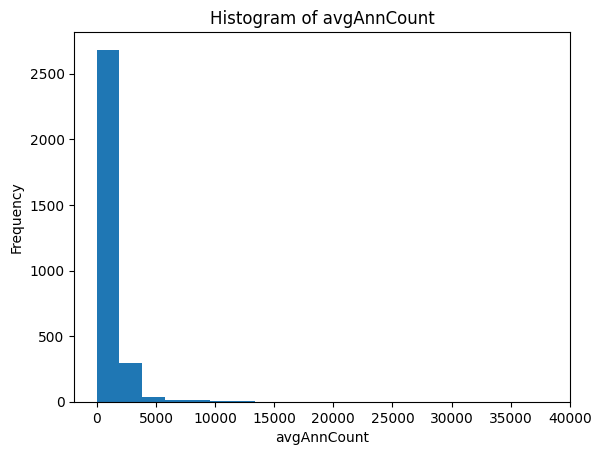

Correlation between avgAnnCount and TARGET_deathRate:  -0.14353161968868805


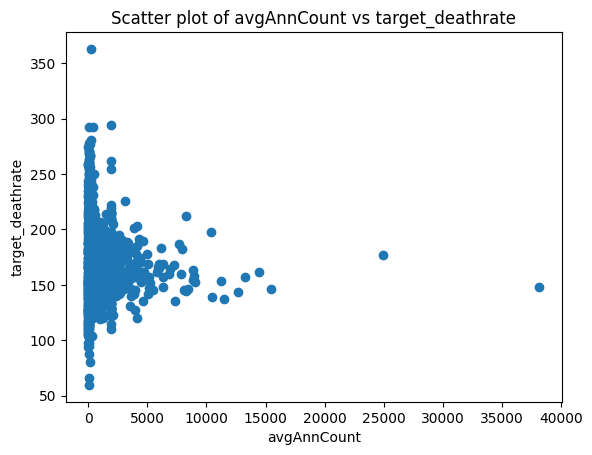

In [14]:
# Analyzing avgAnnCount column
avg_ann_count_mean = data["avgAnnCount"].mean()
avg_ann_count_std = data["avgAnnCount"].std()
print("Mean of avgAnnCount: ", avg_ann_count_mean)
print("Standard deviation of avgAnnCount: ", avg_ann_count_std)

# create a histogram to visualize the distribution of avgAnnCount
plt.hist(data["avgAnnCount"], bins=20)
plt.xlabel("avgAnnCount")
plt.ylabel("Frequency")
plt.title("Histogram of avgAnnCount")
plt.show()

fig = go.Figure(data=[go.Box(y=data['avgAnnCount'], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Avgnncount',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()

# calculate the correlation between avgAnnCount and TARGET_deathRate
corr = data["avgAnnCount"].corr(data["TARGET_deathRate"])
print("Correlation between avgAnnCount and TARGET_deathRate: ", corr)

# create a scatter plot to visualize the relationship between avgAnnCount and TARGET_deathRate
plt.scatter(data["avgAnnCount"], data["TARGET_deathRate"])
plt.xlabel("avgAnnCount")
plt.ylabel("target_deathrate")
plt.title("Scatter plot of avgAnnCount vs target_deathrate")
plt.show()



## Interpreting the visualizations
* Mean : The mean of avgAnnCount is 606.34, which tells us that on average, there were 606 cases of cancer diagnosed annually per country in the dataset.

* Standard deviation: The standard deviation of avgAnnCount is 1416.36, which tells us how spread out the data is. In this case, it indicates that the data is quite spread out, with some counties having relatively low numbers of cancer diagnoses annually and some having relatively high numbers. This is further confirmed by the histogram or boxplot that shows the distribution of avgAnnCount.

* Correlation: The correlation between avgAnnCount and TARGET_deathRate is -0.14, which tells us the strength and direction of the linear relationship between the two variables. A correlation value ranges between -1 and 1. correlation of -1 means that there is a perfect negative linear relationship between the two variables, which mean that as one variable increases, the other variable decreases. A correlation of 1 means that there is a perfect positive linear relationship between the two variables, which means that as one variable increases, the other variable also increases. A correlation of 0 means that there is no linear relationship between the two variables.

# D'Agostino and Pearson's Test To Identify Normally Distributed Data & Outlier Detection

In [16]:
from scipy.stats import normaltest

numerical_columns = data.select_dtypes(include=np.number).columns
gaussian_cols = []
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col)
    else:
        non_gaussian_cols.append(col)
print(gaussian_cols)

Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=nan, p=nan
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=nan, p=nan
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=nan, p=nan
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
['PctPublicCoverage']


In [17]:
len(gaussian_cols)

1

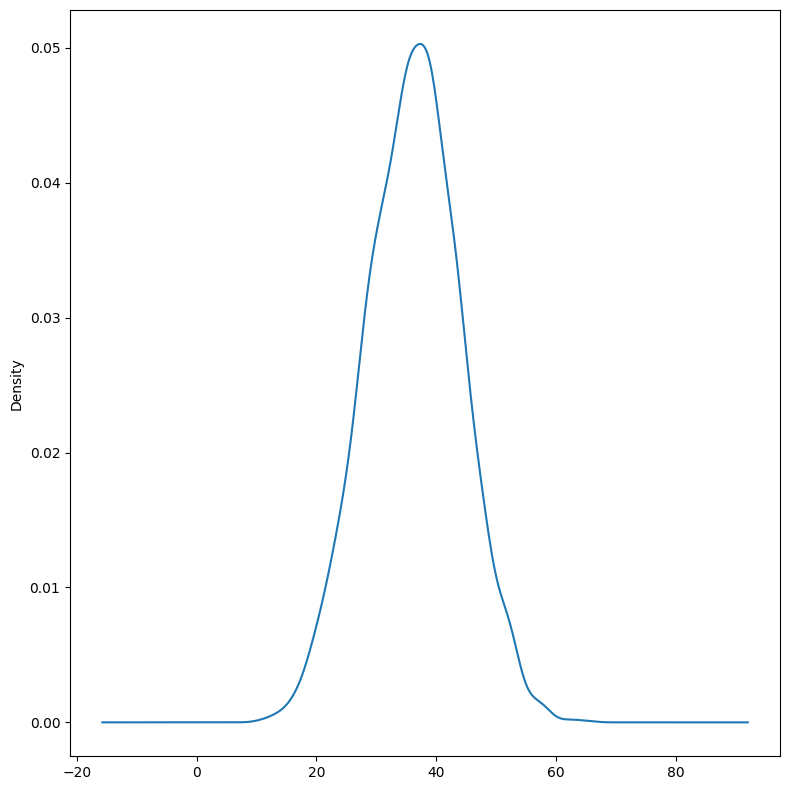

In [20]:
# make subplots for all gaussian cols as density plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
for i, col in enumerate(gaussian_cols):
    data[col].plot(kind='density', ax=axes, subplots=True, sharex=False)
plt.tight_layout()
plt.show()


In [21]:
gaussian_data = data[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [25]:
# Take the mean, std, min, max for every gaussian column
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]
basic_info_gaussian

,PctPublicCoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [30]:
# Dealing with outlier values for incidenceRate column
print("Highest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"] + 3*basic_info_gaussian['PctPublicCoverage']["std"])
print("Lowest allowed",basic_info_gaussian["PctPublicCoverage"]["mean"] - 3*basic_info_gaussian['PctPublicCoverage']["std"])

data[(data['PctPublicCoverage'] > 59.777864755203105) | (data['PctPublicCoverage'] < 12.727419130586192)]

Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,"[22640, 34218.1]",42.6,...,16.8,14.3,62.7,46.6,63.648069,0.128755,0.000000,35.579399,43.349456,1.084813
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,"(61494.5, 125635]",35.3,...,77.1,68.9,11.8,4.6,67.770250,7.432026,16.200029,3.625733,65.513259,6.198748
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,"(51046.4, 54545.6]",65.3,...,NaN,18.8,65.1,21.8,88.341121,8.341859,0.715201,0.957595,61.945503,6.766414
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,"(61494.5, 125635]",36.8,...,60.4,58.3,11.2,6.2,31.562280,4.732583,37.156932,5.295567,42.882250,4.391052
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,"[22640, 34218.1]",54.8,...,23.7,20.9,62.2,31.3,73.926727,0.196705,0.826162,8.984509,46.567005,4.686490


In [34]:
# Deal with Outliers
def deal_with_outliers(df, col, basic_info):
    upper_limit = basic_info[col]['mean'] + 3*basic_info[col]['std']
    lower_limit = basic_info[col]['mean'] - 3*basic_info[col]['std']
    df = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return df

cols_have_outliers = []
for col in gaussian_cols:
  df = deal_with_outliers(data, col, basic_info_gaussian)
  if df.shape[0] > 0:
    cols_have_outliers.append(col)
print(cols_have_outliers)

['PctPublicCoverage']


In [35]:
# Trimming
for col in cols_have_outliers:
  highest_allowed = basic_info_gaussian[col]['mean'] + 3 * basic_info_gaussian[col]['std']
  lowest_allowed = basic_info_gaussian[col]['mean'] - 3 * basic_info_gaussian[col]['std']
  data = data[(data[col] > lowest_allowed) & (data[col] < highest_allowed)]
data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [37]:
# capping
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    capped_data = data.copy()
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed
capped_data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


## To Identify Skewness


In [50]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [57]:
# remove columns which are categorical and have less than 10 unique values
cols_to_remove = []
for col in data.columns:
    print(col)
    if data[col].nunique() < 10:
      cols_to_remove.append(col)
print(len(cols_to_remove))
data_for_skewness = data.drop(cols_to_remove, axis=1)

avgAnnCount
avgDeathsPerYear
TARGET_deathRate
incidenceRate
medIncome
popEst2015
povertyPercent
studyPerCap
binnedInc
MedianAge
MedianAgeMale
MedianAgeFemale
Geography
AvgHouseholdSize
PercentMarried
PctNoHS18_24
PctHS18_24
PctSomeCol18_24
PctBachDeg18_24
PctHS25_Over
PctBachDeg25_Over
PctEmployed16_Over
PctUnemployed16_Over
PctPrivateCoverage
PctPrivateCoverageAlone
PctEmpPrivCoverage
PctPublicCoverage
PctPublicCoverageAlone
PctWhite
PctBlack
PctAsian
PctOtherRace
PctMarriedHouseholds
BirthRate
0


In [47]:
def identify_skewed_cols(df, cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns)
len(skewed_cols)

TypeError: could not convert string to float: '(61494.5, 125635]'